In [1]:
"""
    Import necessary packages in python 
"""
%matplotlib inline
import os
import sys 
import numpy as np 
import matplotlib as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
"""
OS Paths for loading dataset and assets
"""
cwd = os.getcwd()

DATA_PATH = os.path.join(cwd, "data")
UTILS_PATH = os.path.join(cwd, "utils")
MODELS_PATH = os.path.join(cwd, "models")

## Add the utils path 
sys.path.append(UTILS_PATH)
sys.path.append(MODELS_PATH)

#load our data loader methods 

import os
import pandas

def load_HAM10000_metadata(data_path, verbose=False):
    metadata_fname = "HAM10000_metadata.csv"
    metadata_fpath = os.path.join(data_path, metadata_fname)
    if os.path.exists(metadata_fpath):
        print("Found HAM10000 metadata file, loading into pandas df")

        df = pandas.read_csv(metadata_fpath)
        print("Done")
        return df

    else:
        raise FileNotFoundError(f"Could not find HAM100000 metadata at \"{metadata_fpath}\"")

def load_HAM10000_L(data_path, size_8=True, size_28=False):
    hmnist8_8_L = None
    hmnist28_28_L = None 

    if size_8:
        file_name = "hmnist_8_8_L.csv"
        file_path = os.path.join(data_path, file_name)

        if os.path.exists(file_path):
            print("Found HAM10000 luminescence images in size 8x8")

            hmnist8_8_L = pandas.read_csv(file_path)
            # print(hmnist8_8_L.head(3))
            print("Done")
        else:
            raise FileNotFoundError(f"Could not find luminescence image csv at \"{file_path}\"")

    return hmnist8_8_L, hmnist28_28_L

def load_HAM10000_RGB(data_path, prints, size_28=True, size_8=False):
    hmnist_28_28_RGB = None 

    if size_28:
        file_name="hmnist_28_28_RGB.csv"
        file_path = os.path.join(data_path, file_name)

        if os.path.exists(file_path):
            print("Found HAM10000 RGB images in size 28x28, reading into df")
            hmnist_28_28_RGB = pandas.read_csv(file_path)
            print("Done")
            if prints:
                print(hmnist_28_28_RGB.head())
        else:
            raise FileNotFoundError(f"Could not RGB images \"{file_path}\"")
    return hmnist_28_28_RGB

hmnist_metadata = load_HAM10000_metadata(DATA_PATH)
# Quick test:
# for f in os.listdir(DATA_PATH):
#     print(os.path.join(DATA_PATH, f))

#Import data 
# import 
# metadata = pd.read_csv(os.path.join(DATA_PATH, "HAM10000_metadata.csv"))
# hmnist8_8_L = data_loader.load_HAM10000_L(DATA_PATH)

hmnist_28_28_RGB = load_HAM10000_RGB(DATA_PATH, False)

Found HAM10000 metadata file, loading into pandas df
Done
Found HAM10000 RGB images in size 28x28, reading into df
Done


data shape before PCA  (10015, 2353)
data shape after PCA  (10015, 10)


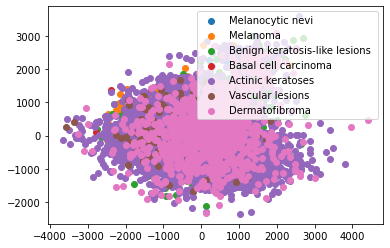

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
print("data shape before PCA ",hmnist_28_28_RGB.shape)
pca = PCA(n_components=10)
pca.fit(hmnist_28_28_RGB)
temp = pca.fit_transform(hmnist_28_28_RGB)
print("data shape after PCA ",temp.shape)
X = temp
y = hmnist_28_28_RGB["label"]
lesion_type_dict = {
    'Melanocytic nevi': 0,
    'Melanoma': 1,
    'Benign keratosis-like lesions ': 2,
    'Basal cell carcinoma': 3,
    'Actinic keratoses': 4,
    'Vascular lesions': 5,
    'Dermatofibroma': 6
}
dictionary = list(lesion_type_dict)
for i in np.unique(y):
    plt.scatter(temp[i==y, 0], temp[i==y, 1], label = dictionary[i])
#     plt.scatter(temp[i==y, 0], temp[i==y, 1])
    plt.legend()
plt.show()

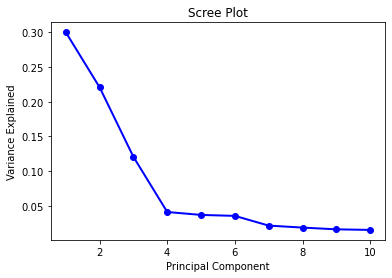

In [13]:


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()